## Solutions to problem_3 of Assignment_1
<b>Importing of necessary libraries.</b>

In [1]:
import pandas as pd
import numpy as np
# Display first 10 rows
pd.set_option('display.max_rows', 10)
# libraries for plotting
import matplotlib.pyplot as plt
# for the graph to be plotted on Notebook
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Reading wage dataset and dividing it into `train` and `test` dataset i.e. first 2400 in train and the rest 600 in test. <br>
Here, wage_dataset is a Dataframe and its rows are accessed by `pd.Dataframe.iloc()`.<br> 
Here, `header = None` is used because in our dataset column names were not given, so default numbering is done.

In [2]:
wage_dataset = pd.read_csv('P3_data/Wage_dataset.csv', header=None)
train = wage_dataset.iloc[0:2400]
test = wage_dataset.iloc[2400:3000]
test

,0,1,2,3,4,5,6,7,8,9,10
2400,2008,40,2,1,2,2,2,2,1,4.505150,90.481913
2401,2006,56,2,1,5,2,2,2,1,4.763428,117.146817
2402,2009,50,2,1,2,2,1,2,1,4.602060,99.689464
2403,2009,49,2,1,2,2,1,2,1,5.113943,166.324941
2404,2007,32,2,1,1,2,2,2,2,4.397940,81.283253
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


A function which calculates X matrix.
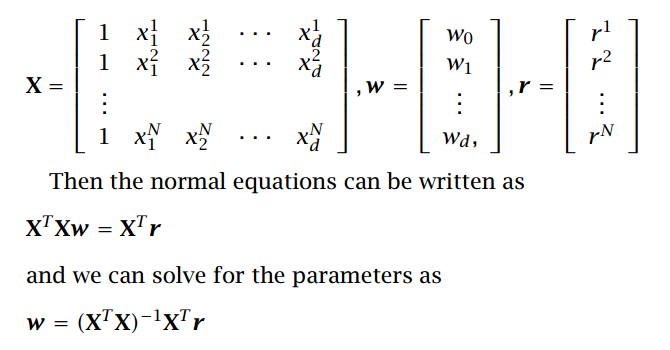
In teh function given below x is [x1,x2,x3....xN] <br>
And this function returns the matrix X given in above equation with d the order of the polynomial.

In [3]:
def D(x,d):
    D1=[]
    for i in range(len(x)):
        a=[]
        for j in range(d):
            a.append(x[i]**j)
        D1.append(a)
    return D1

A function which calculates w matrix.

In [4]:
def poly_regression(X,r):
    w = np.linalg.inv(np.transpose(X)*X)*np.transpose(X)*r
    return w

## Age vs Wage
Storing wage in wage. Wage is 11th column.

In [5]:
wage = train[10]
wage = np.matrix(wage)

Age is a Series. So, It is converted to list and matrix to make the calculation easier.

In [6]:
Age = train[1]
# converting series to  a list and then to a matrix to make the calculation simpler
Age = pd.Series.tolist(Age)
r = np.matrix(Age)
D_matrix = np.matrix(D(Age,5))

w_train = poly_regression(D_matrix, np.transpose(wage))
w_train

Age_test = test[1]
Age_test = pd.Series.tolist(Age_test)
r_test = np.matrix(Age_test)
D_matrix_test = np.matrix(D(Age_test,5))
# Now, predicting the value of test by multiplying the calculated value of w_train and D_matrix_test.
predicted = D_matrix_test*w_train
original = pd.Series.tolist(test[10])
print(mean_squared_error(predicted,original))
print(mean_absolute_error(predicted,original))

1657.20451769
28.4094568848


Mean Square Error @ `d = 2` is 1720.87 <br>Mean Square Error @ `d = 3` is 1664.64 <br> Mean Square Error @ `d = 4` is 1661.94 <br>  Mean Square Error @ `d = 5` is 1657.20451769 <br> Mean Square Error @ `d = 6` is 1657.2045199 <br> Mean Square Error @ `d = 7` is 1661.94748495 <br> Mean Square Error @ `d = 8` is 1664.8009733319591

Mean Absolute Error @ `d = 2` is 30.5749983932 <br>Mean Absolute Error @ `d = 3` is 30.5749983932 <br> Mean Absolute Error @ `d = 4` is 30.5749983932 <br>  Mean Absolute Error @ `d = 5` is 30.5749983932 <br> Mean Absolute Error @ `d = 6` is 30.5749983932 <br> Mean Absolute Error @ `d = 7` is 30.5749983932 <br> Mean Absolute Error @ `d = 8` is 30.5749983932

As we can see `d = 5` is the optimal choice for the error to be minimum.

## Year vs Wage
Year is the first column of the csv file.

In [7]:
Year = train[0]
Year = pd.Series.tolist(Year)
Year_matrix = np.matrix(Year)
D_matrix_year = np.matrix(D(Year,6))
w_train_year = poly_regression(D_matrix_year, np.transpose(wage))
Year_test = test[0]
Year_test = pd.Series.tolist(Year_test)
Year_test_matrix = np.matrix(Year_test)
D_matrix_test = np.matrix(D(Year_test,6))
predicted_year = D_matrix_test*w_train_year
print(mean_squared_error(predicted_year,original))
print(mean_absolute_error(predicted_year,original))

1.59917220908e+19
3998911341.14


Mean Square Error @ d = 2 is 1807.26959391 <br>
Mean Square Error @ d = 3 is 1806.09397983 <br> 
Mean Square Error @ d = 4 is 1807.26959391 <br>  
Mean Square Error @ d = 5 is 1811.17887972 <br> 
Mean Square Error @ d = 6 is 1.59e+19 <br> 

Mean Absolute Error @ `d = 2` is 30.5916817993 <br>Mean Absolute Error @ `d = 3` is 30.5749983932 <br> Mean Absolute Error @ `d = 4` is 30.591681799 <br>  Mean Absolute Error @ `d = 5` is 30.5605886982 <br> Mean Absolute Error @ `d = 6` is 3998911341.14

As we can see `d = 3` is the optimal choice for the error to be minimum.

## Education vs Wage

In [8]:
Education = train[4]
Education = pd.Series.tolist(Education)
Education_matrix = np.matrix(Education)
D_matrix_education = np.matrix(D(Education,7))
w_train_education = poly_regression(D_matrix_education, np.transpose(wage))
Education_test = test[4]
Education_test = pd.Series.tolist(Education_test)
Education_test_matrix = np.matrix(Education_test)
D_matrix_education = np.matrix(D(Education_test,7))
predicted_education = D_matrix_education*w_train_education
print(mean_squared_error(predicted_education,original))
print(mean_absolute_error(predicted_education,original))

56098363.4193
5158.06464042


Mean Square Error @ `d = 2` is 1366.31487249 <br>Mean Square Error @ `d = 3` is 1361.76838591 <br> Mean Square Error @ `d = 4` is 1358.84930954 <br>  Mean Square Error @ `d = 5` is 1361.44143778 <br> Mean Square Error @ `d = 6` is 11373249442.5 <br> Mean Square Error @ `d = 7` is 56098363.4193

Mean Absolute Error @ `d = 2` is 25.3281922697 <br>Mean Absolute Error @ `d = 3` is 25.4857051691 <br> Mean Absolute Error @ `d = 4` is 25.4941034128 <br>  Mean Absolute Error @ `d = 5` is 25.5059222448 <br> Mean Absolute Error @ `d = 6` is 85678.9569497 <br> Mean Absolute Error @ `d = 7` is 5158.06464042

As we can see `d = 4` is the optimal choice for the error to be minimum.

   After observing above calculations for mean_square_error and mean_absolute_error for `agevswage` and `yearvswage` for different values of `d`, `d=5` is optimal value for <b> AgevsWage </b> , `d=3` is optimal value for <b> YearvsWage </b> `d=4` is optimal value for <b> EducationvsWage </b><br>
   We can predict accurate prediction of a particular man's wage from one of these 3 attributes alone as <b> Mean_Absolute_Error </b> is around 30 in the first two cases and around 25 in the last case. <br>
   And <b>Education v/s wage</b> will be the best choice for prediction as its MSE and MAE is less as compared to other two.

### Plotting of education vs wage

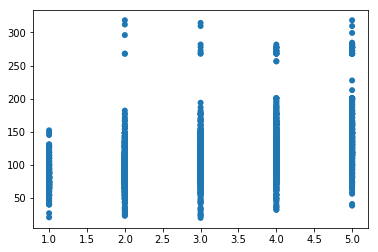

In [9]:
x = wage_dataset[4]
y = wage_dataset[10]

plt.scatter(x,y,edgecolors='none')